In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

In [72]:
!ls

CS01.csv       CS02.csv       Untitled.ipynb


In [73]:
CS01 = pd.read_csv("CS01.csv")
CS02 = pd.read_csv("CS02.csv")

In [74]:
CS01

,구분(1),구분(2),시점,데이터
0,총계,소계,2015.01,0.70
1,총계,소계,2015.02,0.60
2,총계,소계,2015.03,0.60
3,총계,소계,2015.04,0.50
4,총계,소계,2015.05,0.40
...,...,...,...,...
12733,제주특별자치도,도평균,2022.08,0.30
12734,제주특별자치도,도평균,2022.09,0.20
12735,제주특별자치도,도평균,2022.10,0.20
12736,제주특별자치도,도평균,2022.11,0.30


In [75]:
CS01 = CS01.drop(['구분(2)'], axis=1)

In [76]:
CS02 = CS02.drop(['구분(2)'], axis=1)

In [77]:
CS01 = CS01[~CS01['구분(1)'].str.contains('총계')]
CS02 = CS02[~CS02['구분(1)'].str.contains('총계')]

In [78]:
CS01 = CS01.reset_index().drop(["index"], axis=1)
CS02 = CS02.reset_index().drop(["index"], axis=1)

In [79]:
CS = pd.concat([CS01, CS02], axis=0, ignore_index=True)

In [80]:
CS['시점'] = CS['시점'].astype(str)

In [81]:
CS['시점'].str.split(".").str[0]

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
17854    2014
17855    2014
17856    2014
17857    2014
17858    2014
Name: 시점, Length: 17859, dtype: object

In [82]:
CS['시점'].str.split(".").str[1][0]

'01'

In [83]:
TimeCount = CS['시점'].count()

In [84]:
TimeCount

17859

In [85]:
a = []

In [86]:
CS['월'] = CS['시점'].str.split('.').str[1].str.zfill(2).tolist()

In [87]:
CS['연도'] = CS['시점'].str.split(".").str[0]

In [88]:
CS

,구분(1),시점,데이터,월,연도
0,서울특별시,2015.01,0.70,01,2015
1,서울특별시,2015.02,0.70,02,2015
2,서울특별시,2015.03,0.60,03,2015
3,서울특별시,2015.04,0.50,04,2015
4,서울특별시,2015.05,0.40,05,2015
...,...,...,...,...,...
17854,제주특별자치도,2014.08,0.40,08,2014
17855,제주특별자치도,2014.09,0.30,09,2014
17856,제주특별자치도,2014.1,0.20,01,2014
17857,제주특별자치도,2014.11,0.30,11,2014


In [89]:
CS = CS.drop(['시점'], axis=1)

In [101]:
CS_01

,구분(1),데이터,월,연도
16622,전라남도,0.60,01,2010
16802,경상북도,0.60,01,2010
14322,경기도,1.00,01,2010
14331,경기도,0.60,01,2010
16751,경상북도,0.50,01,2010
...,...,...,...,...
10876,경상북도,0.30,01,2022
10867,경상북도,0.50,01,2022
8390,전라남도,0.60,01,2022
10910,경상북도,0.20,01,2022


In [96]:
CS_01 = CS[CS['월'].str.contains("01")]

In [99]:
CS_01['데이터'] = CS_01['데이터'].str.split("*").str[0]

In [104]:
CS_01 = CS_01[CS_01['구분(1)'].str.contains("서울특별시|경기도|강원도")]

In [109]:
CS_01['데이터'] = CS_01['데이터'].astype(float)

/var/folders/fy/h0_mgq7926d7ggr2rkt29cz80000gn/T/ipykernel_64848/3398764195.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=CS_01, x='연도', y='데이터', hue='구분(1)', ci=0)


TypeError: 'float' object cannot be interpreted as an integer

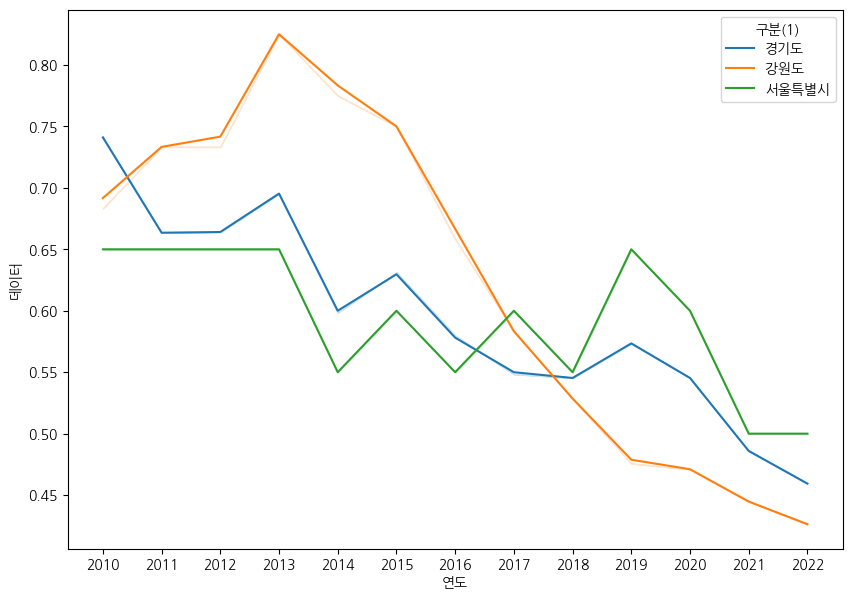

In [113]:
CS_01 = CS_01.sort_values(by=['연도'], ascending=[True])

plt.figure(figsize=(10, 7))
plt.gca().set_facecolor('none')

sns.lineplot(data=CS_01, x='연도', y='데이터', hue='구분(1)', ci=0)

plt.ylim([x for x in range(0, 0.1, 0.1)])
plt.yticks([x for x in range(0, 1)])
plt.show()

In [114]:
# https://www.yna.co.kr/view/AKR20220304174300053